<a href="https://colab.research.google.com/github/thebabycode/ML/blob/main/ML__Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/ML/Mobile/train.csv')
data_train = pd.read_csv('/content/drive/MyDrive/ML/Mobile/train.csv')

Mounted at /content/drive


In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


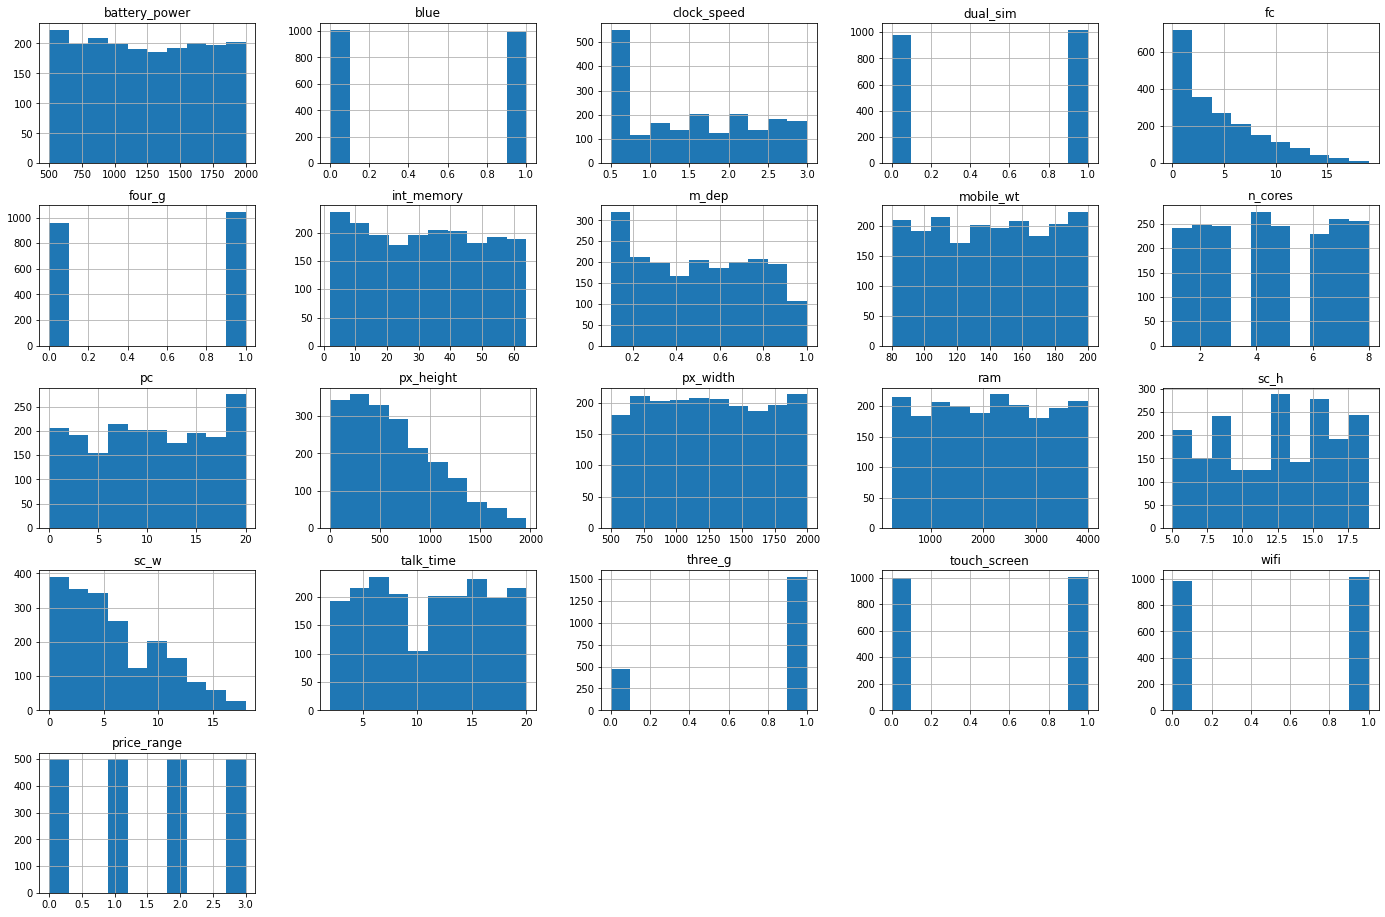

In [ ]:
data.hist(figsize = (24, 16))
plt.show()

In [ ]:
df = data.loc[:, ['battery_power', 'talk_time']]

In [ ]:
df.head()

,battery_power,talk_time
0,842,19
1,1021,7
2,563,9
3,615,11
4,1821,15


Text(0, 0.5, 'price_range')

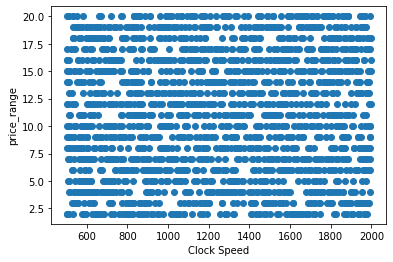

In [ ]:
# plotting scatter plot to know the the cluster
plt.scatter(df.battery_power,df['talk_time'])
plt.xlabel('Clock Speed')
plt.ylabel('price_range')

In [ ]:
df=data[['battery_power','int_memory','n_cores','ram']]

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled=data_scaled.head(50)
data_scaled

,battery_power,int_memory,n_cores,ram
0,0.313655,0.002608,0.000745,0.949533
1,0.361715,0.018777,0.001063,0.932099
2,0.211375,0.015393,0.001877,0.977282
3,0.216817,0.003525,0.002115,0.976204
4,0.790328,0.019096,0.000868,0.612385
5,0.867248,0.010263,0.000467,0.497770
6,0.492259,0.002703,0.002163,0.870442
7,0.941350,0.011562,0.001927,0.337229
8,0.795605,0.029181,0.003854,0.605100
9,0.704262,0.012453,0.006918,0.709797


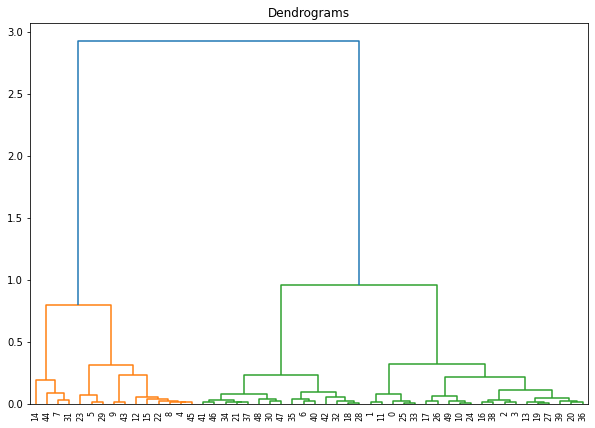

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

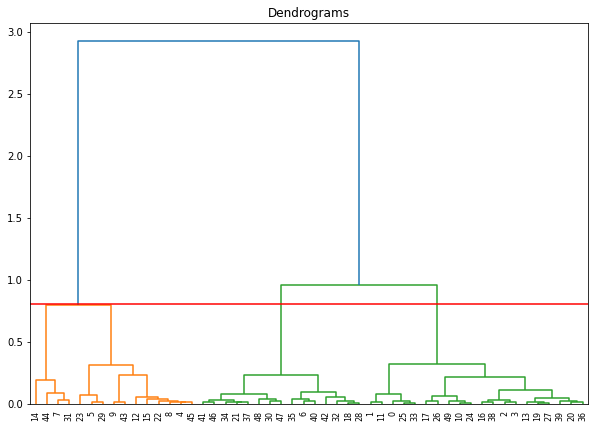

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.8, color='r', linestyle='-')

## **AGNES clustering**

It used to group objects in clusters based on their similarity. It's also known as AGNES (Agglomerative Nesting). The algorithm starts by treating each object as a singleton cluster.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0])

In [ ]:
fig = px.scatter(data_scaled, x='battery_power', y="int_memory", color=cluster.labels_)
fig.show()